In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras import optimizers
import tensorflow as tf
import pickle
import cv2

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls '/content/drive'


MyDrive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/Flowerdatabase/train'
test_path = '/content/drive/MyDrive/Flowerdatabase/test'

Working with 43 images
Image examples: 
bougainvillea_00002.jpg


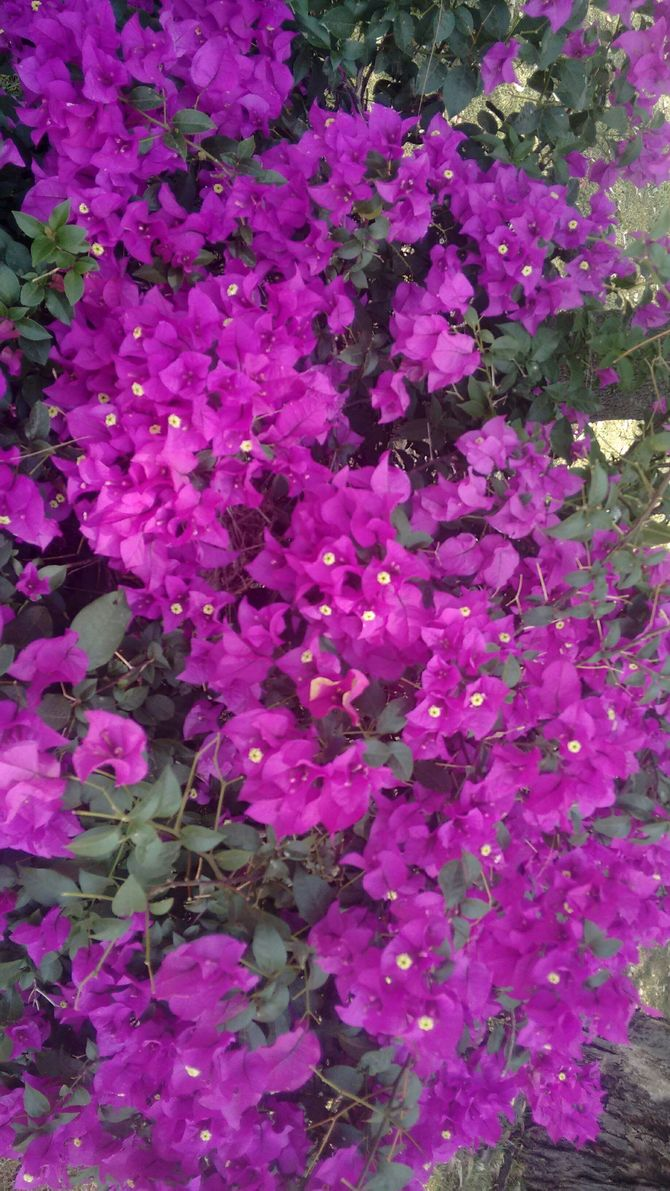

bougainvillea_00003.jpg


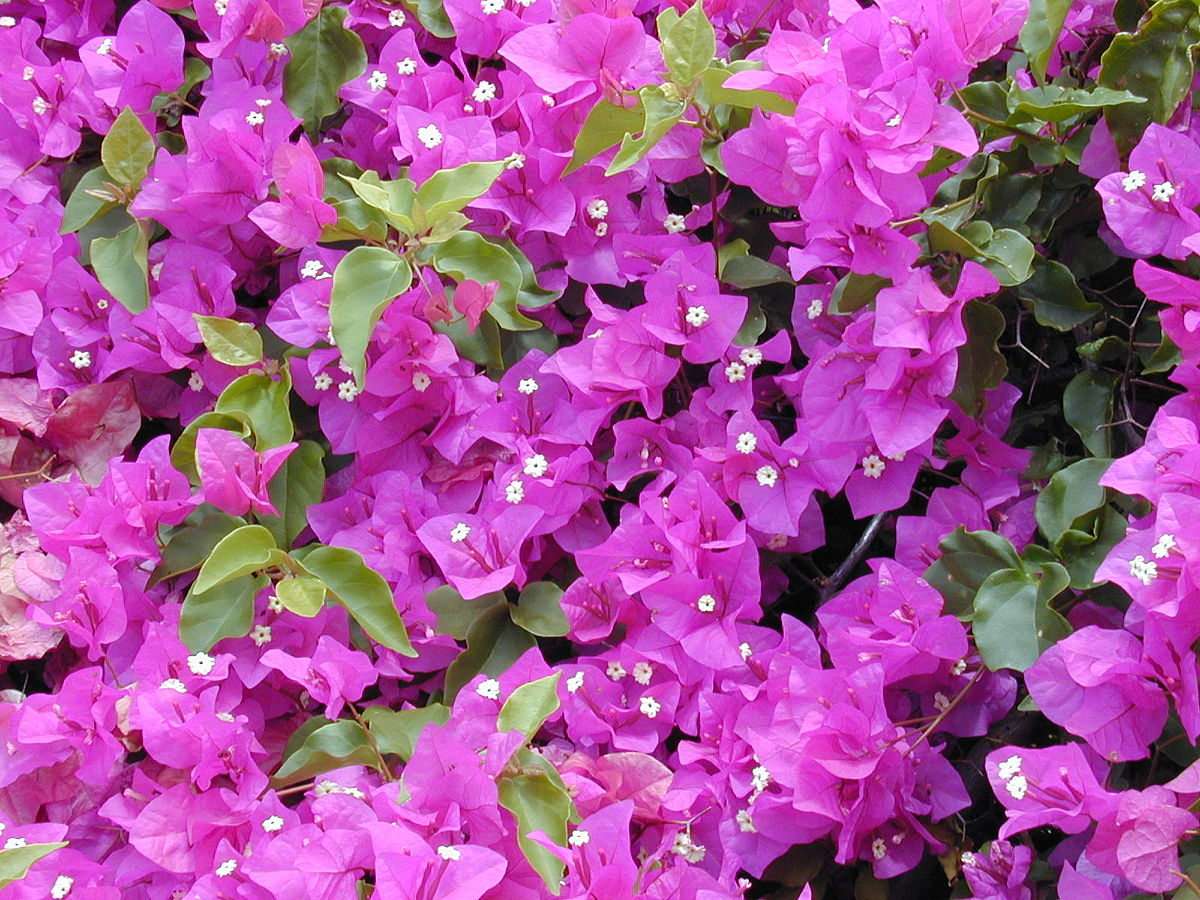

bougainvillea_00009.jpg


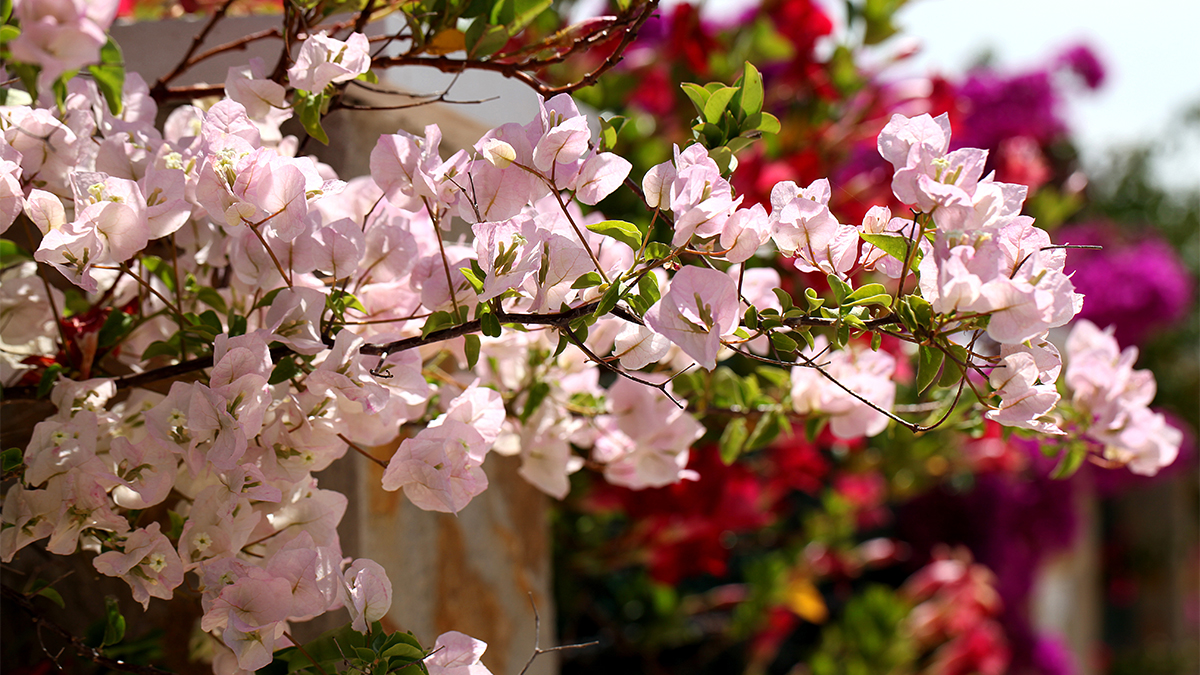

bougainvillea_00004.jpg


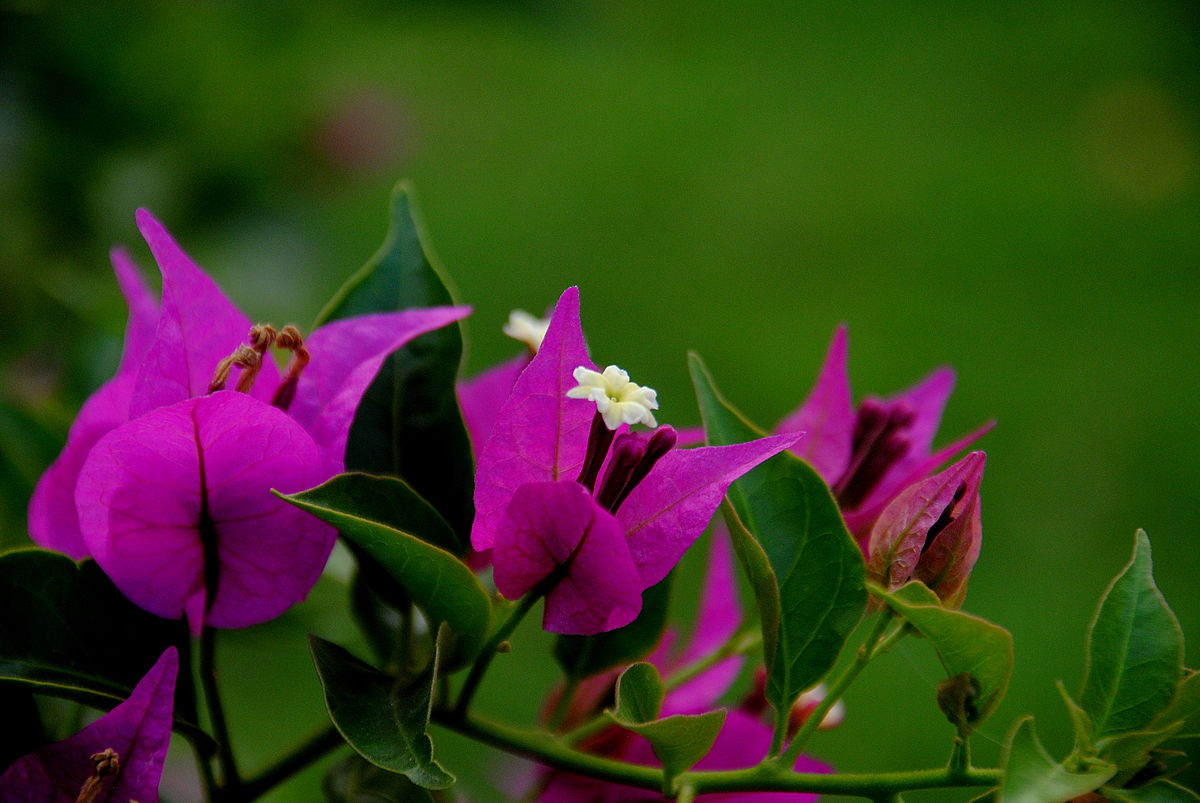

bougainvillea_00007.jpg


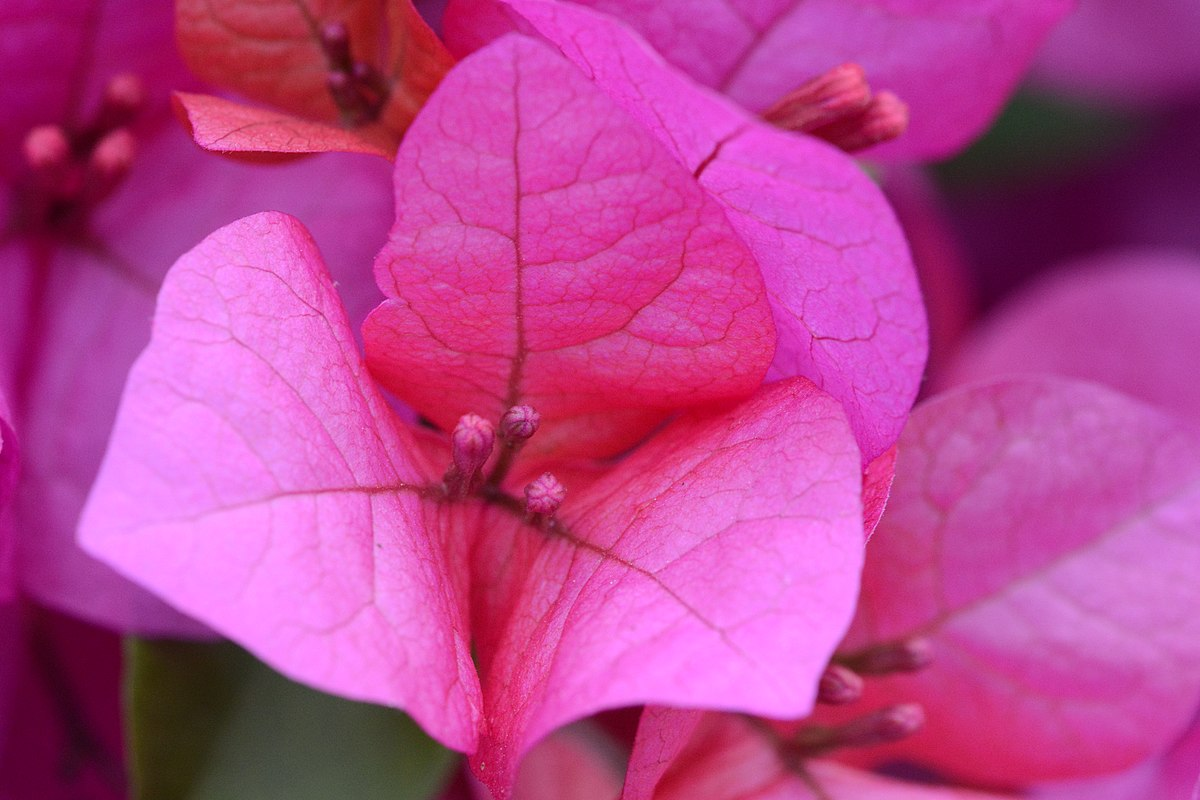

bougainvillea_00010.jpg


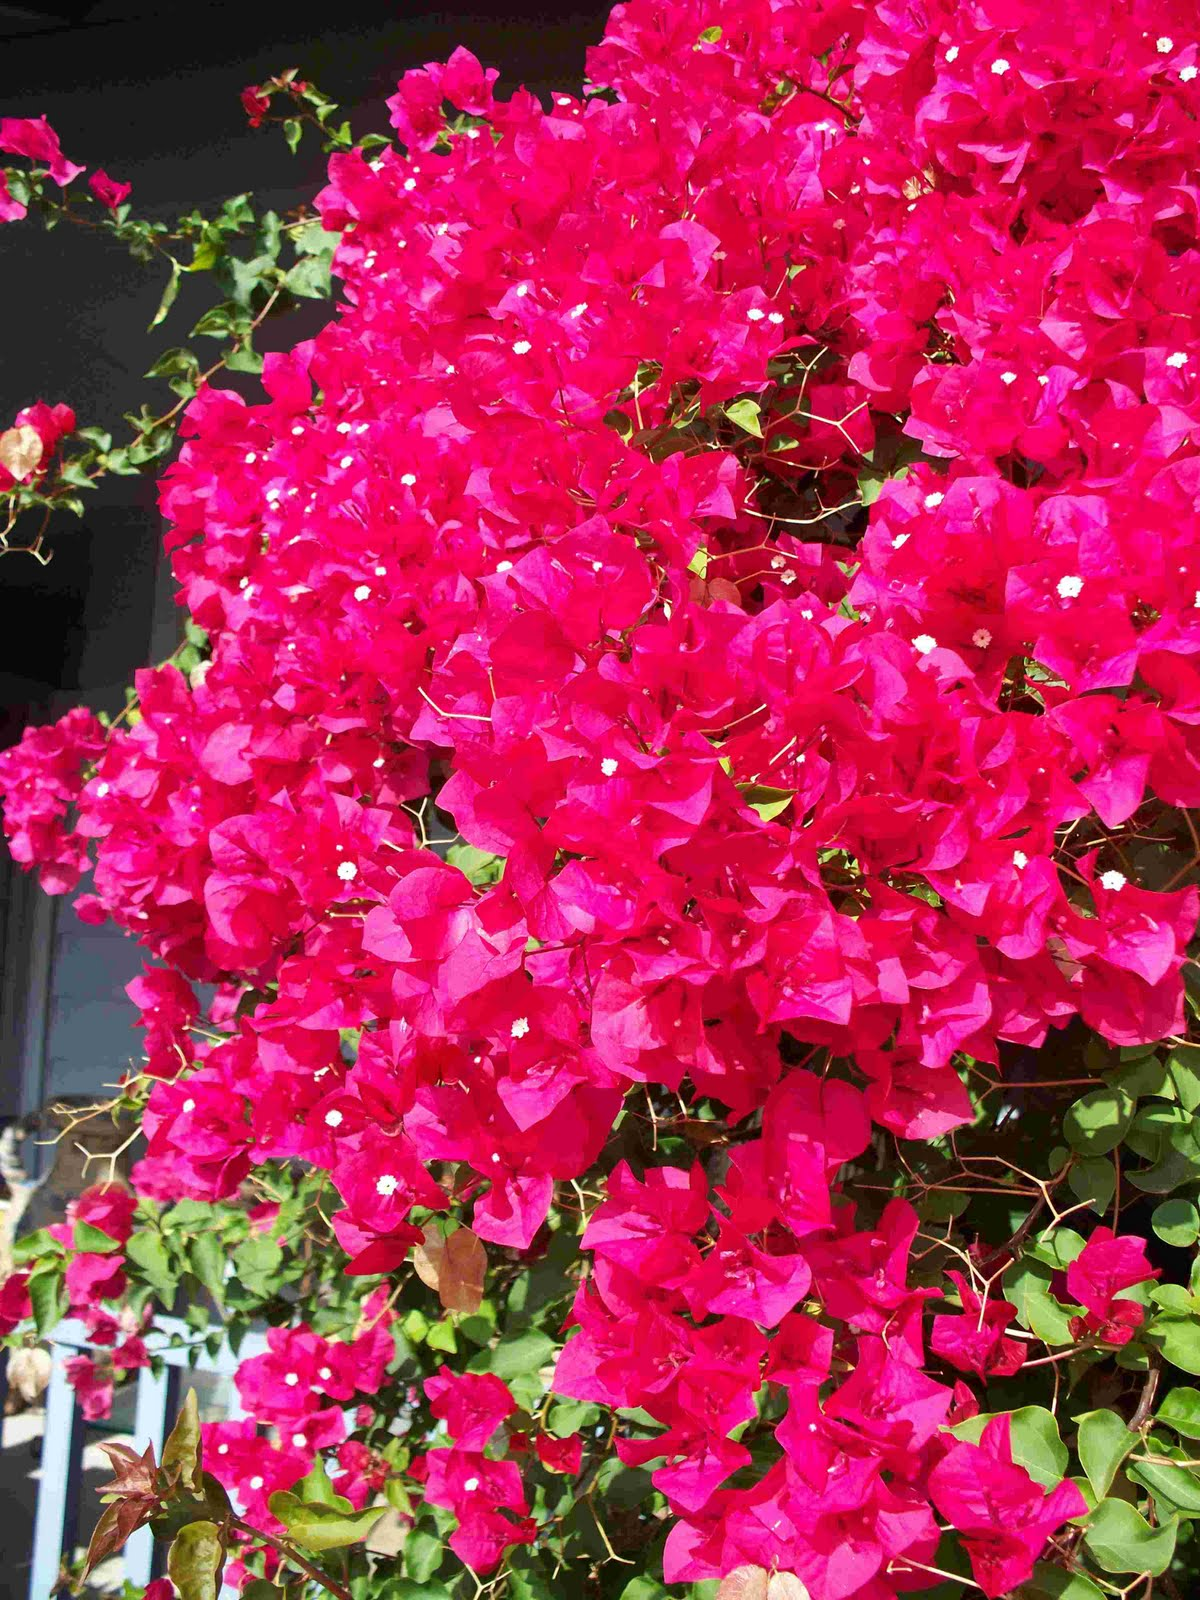

bougainvillea_00012.jpg


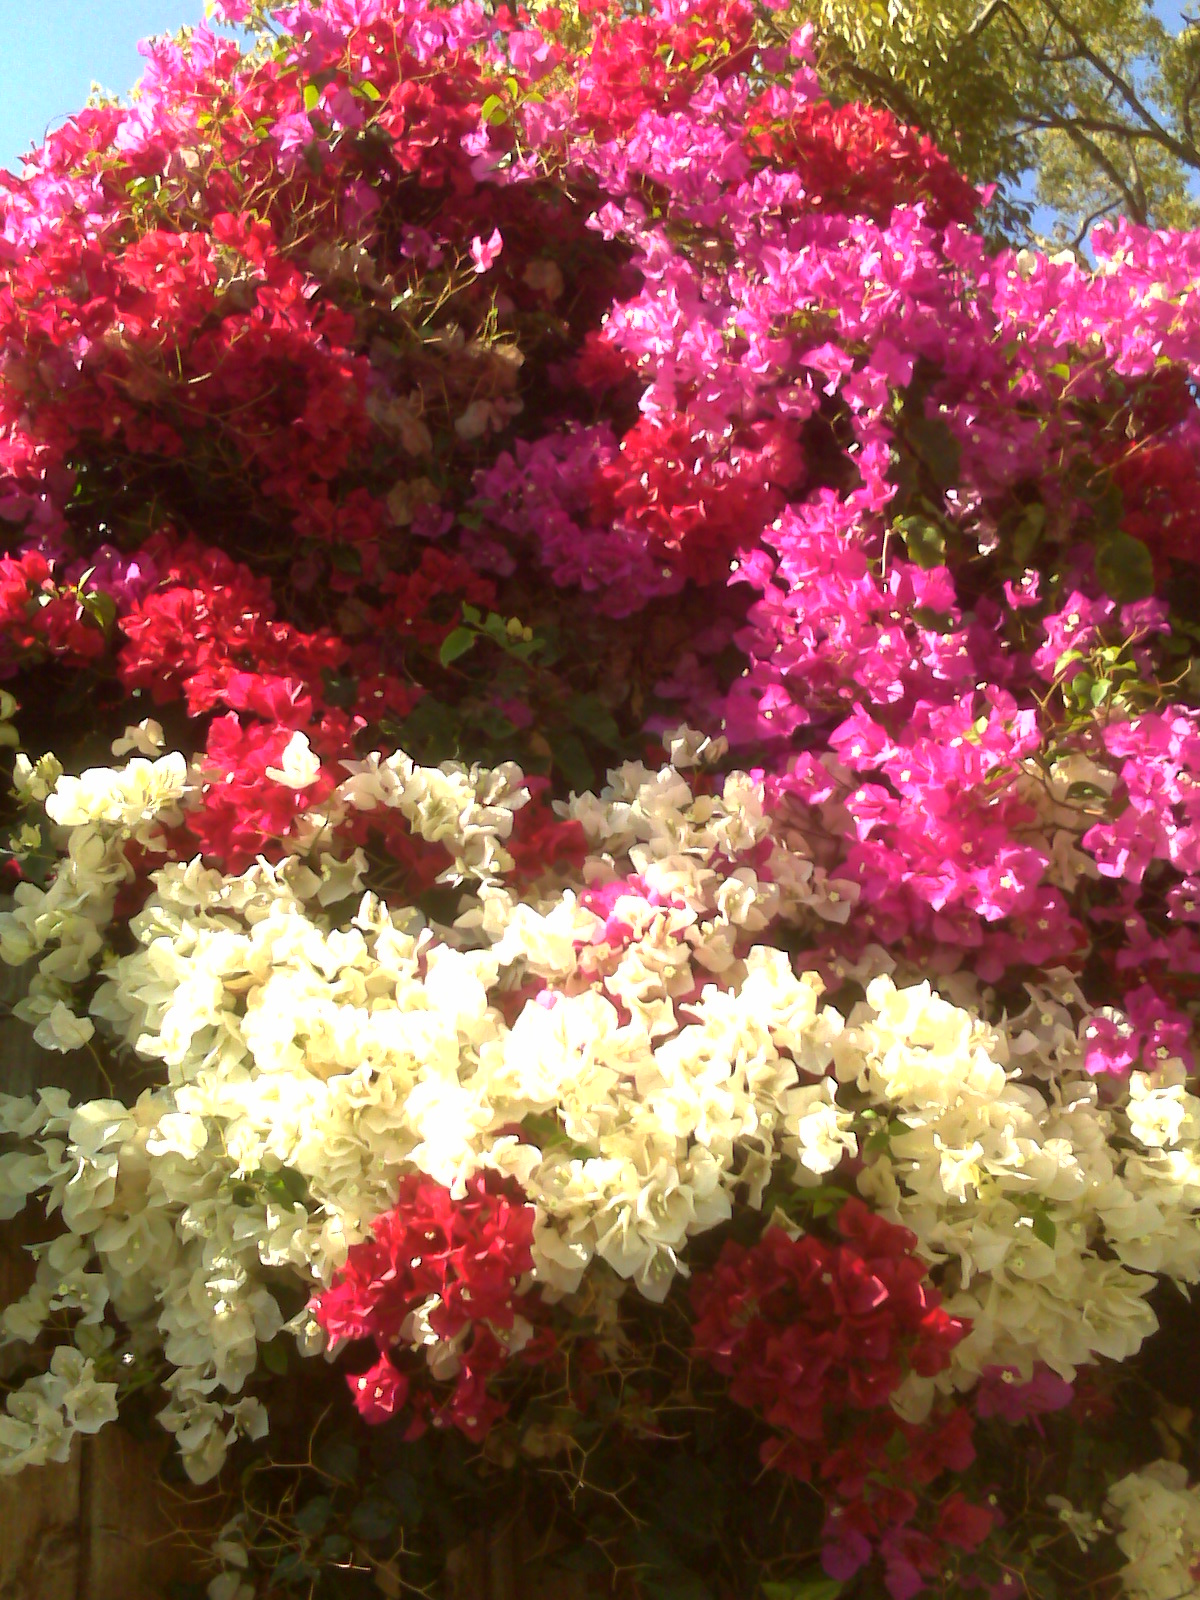

bougainvillea_00006.jpg


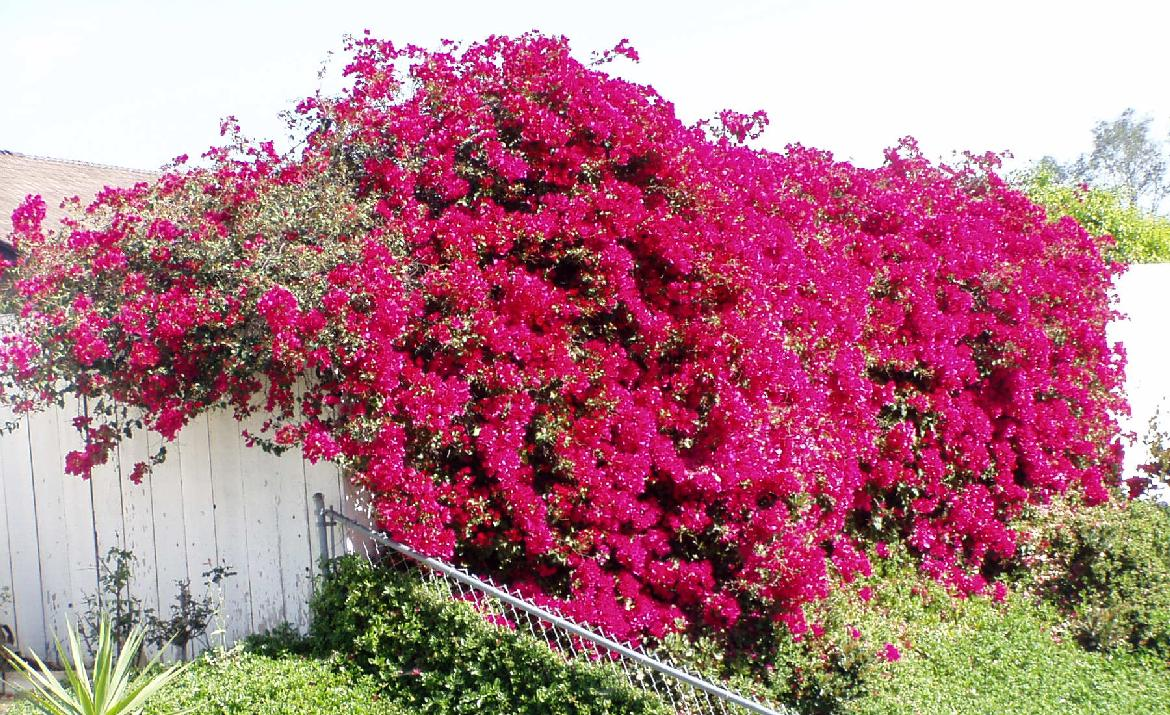

bougainvillea_00005.jpg


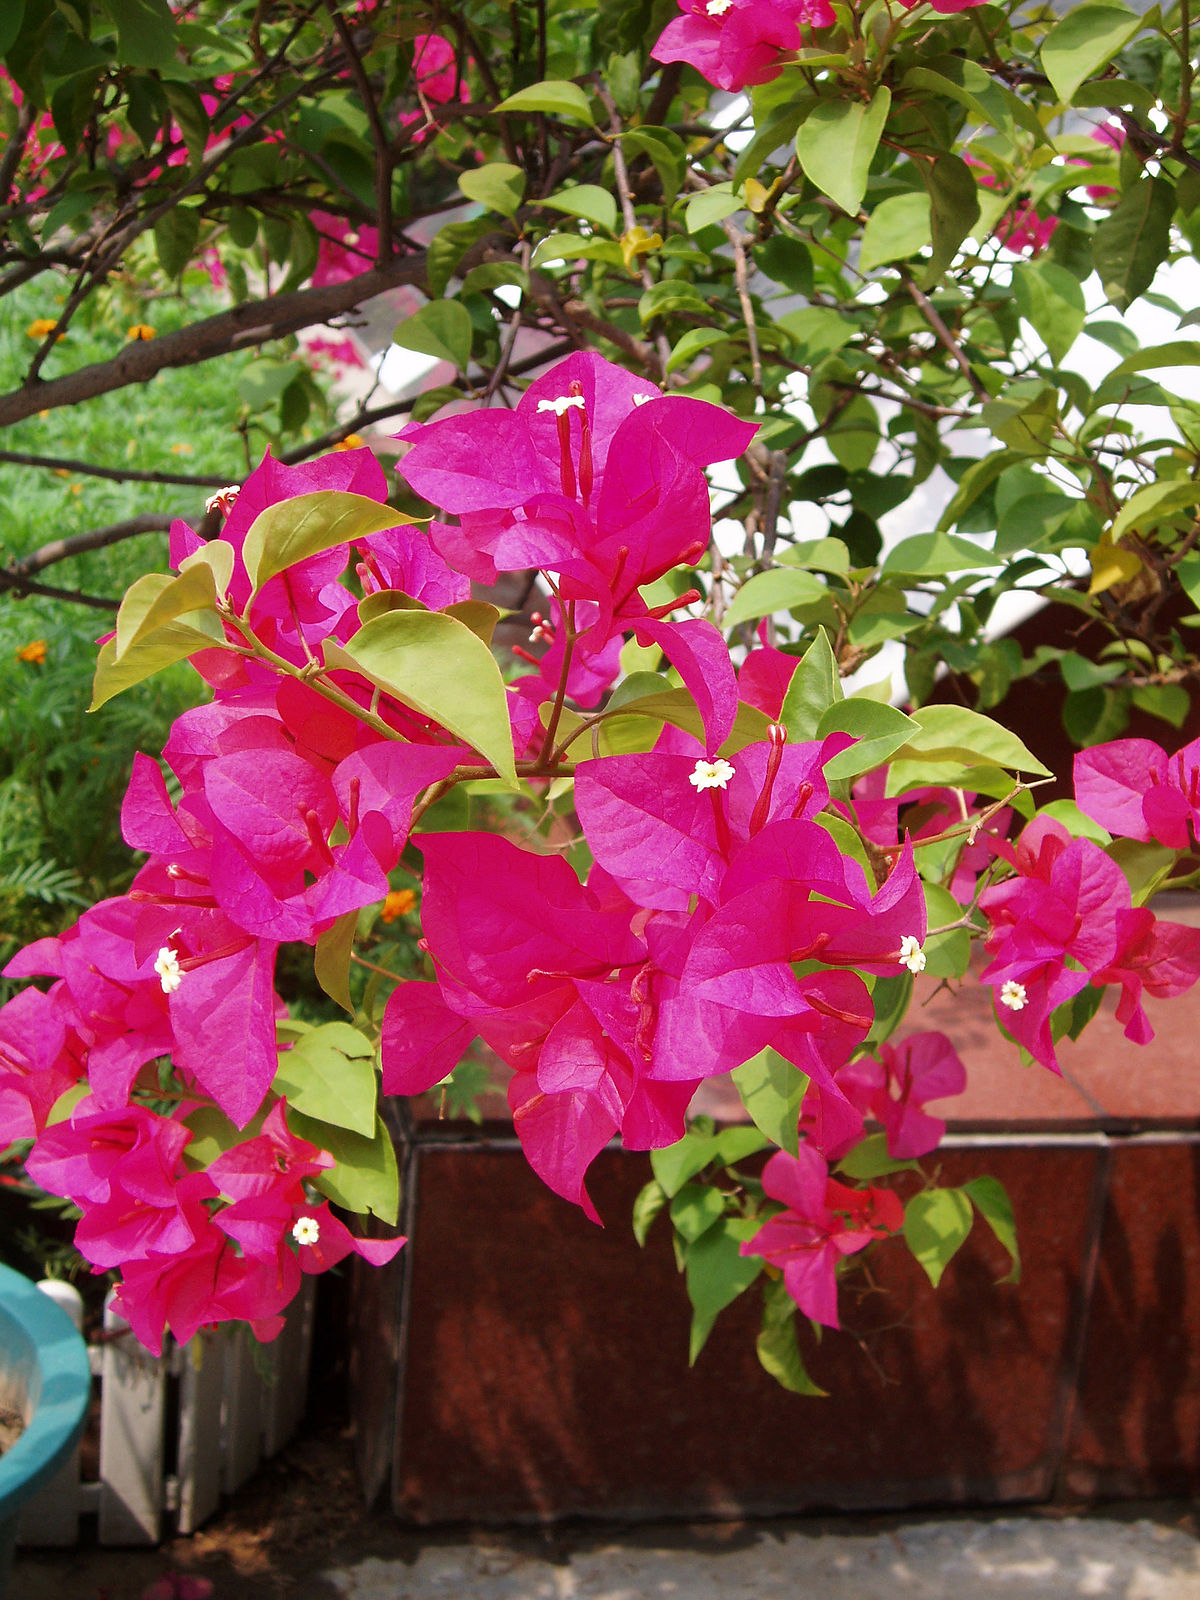

bougainvillea_00008.jpg


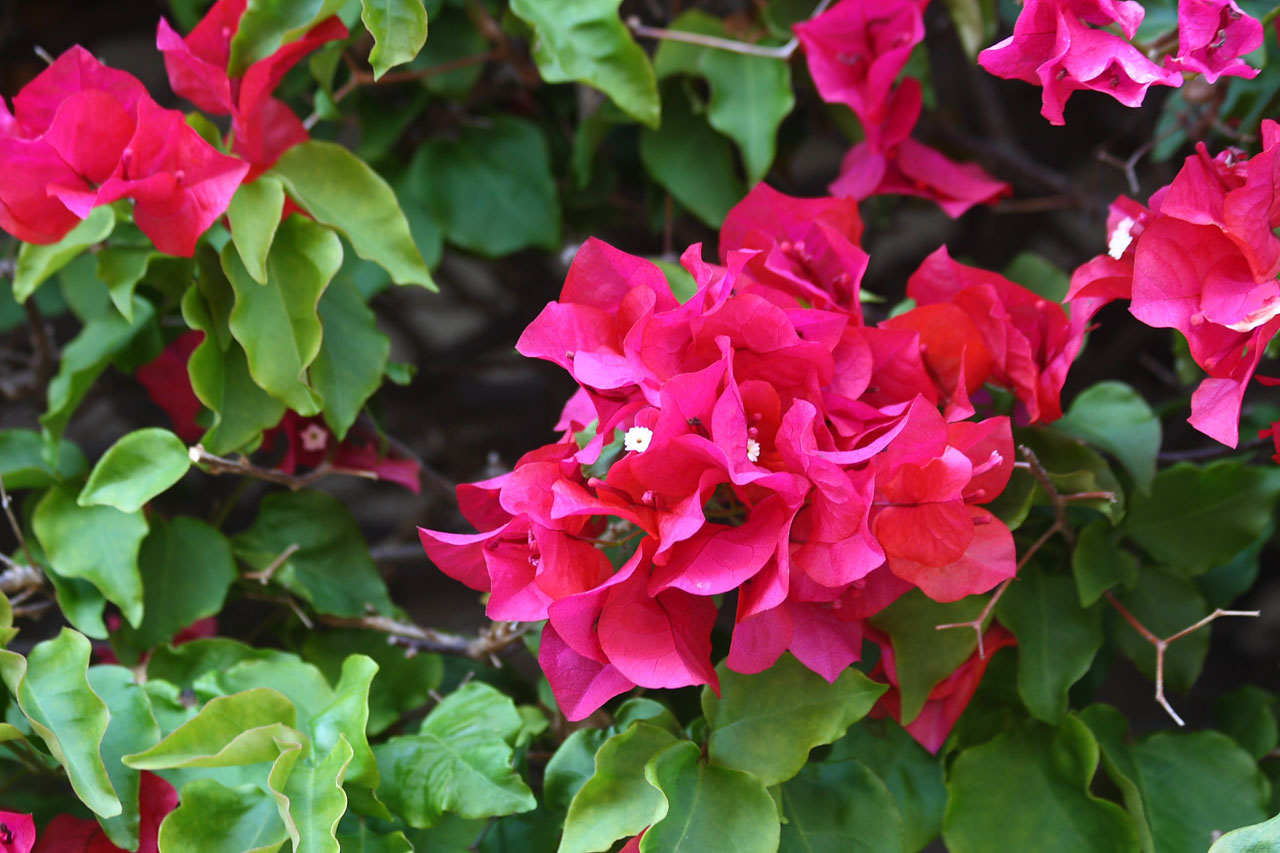

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/bougainvillea'


onlybougainvilleafiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybougainvilleafiles)))
print("Image examples: ")


for i in range(10):
    print(onlybougainvilleafiles[i])
    display(_Imgdis(filename=folder + "/" + onlybougainvilleafiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
folders = glob('/content/drive/MyDrive/Flowerdatabase/train/*')
print(len(folders))


8


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 331 images belonging to 8 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 211 images belonging to 8 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10

Epoch 00001: val_loss improved from inf to 8.39088, saving model to mymodel.h5
5/5 - 219s - loss: 15.5579 - accuracy: 0.3381 - val_loss: 8.3909 - val_accuracy: 0.5308 - 219s/epoch - 44s/step
Epoch 2/10
5/5 - 74s - loss: 6.3116 - accuracy: 0.6547 - 74s/epoch - 15s/step
Epoch 3/10
5/5 - 81s - loss: 4.7983 - accuracy: 0.7500 - 81s/epoch - 16s/step
Epoch 4/10
5/5 - 69s - loss: 4.9044 - accuracy: 0.7626 - 69s/epoch - 14s/step
Epoch 5/10
5/5 - 74s - loss: 3.8972 - accuracy: 0.8273 - 74s/epoch - 15s/step
Epoch 6/10
5/5 - 78s - loss: 3.3490 - accuracy: 0.8313 - 78s/epoch - 16s/step
Epoch 7/10
5/5 - 78s - loss: 2.7771 - accuracy: 0.8375 - 78s/epoch - 16s/step
Epoch 8/10
5/5 - 78s - loss: 1.8381 - accuracy: 0.9187 - 78s/epoch - 16s/step
Epoch 9/10
5/5 - 69s - loss: 2.6277 - accuracy: 0.8633 - 69s/epoch - 14s/step
Epoch 10/10
5/5 - 78s - loss: 3.4722 - accuracy: 0.8500 - 78s/epoch - 16s/step
Training completed in time:  0:16:41.523647


In [ ]:
tf.keras.models.save_model(model,'my_model_new.hdf5')





In [ ]:
pip install streamlit

     |████████████████████████████████| 9.7 MB 5.0 MB/s 
     |████████████████████████████████| 164 kB 52.2 MB/s 
     |████████████████████████████████| 180 kB 52.6 MB/s 
     |████████████████████████████████| 4.3 MB 43.3 MB/s 
     |████████████████████████████████| 111 kB 58.2 MB/s 
     |████████████████████████████████| 76 kB 5.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 128 kB 60.0 MB/s 
     |████████████████████████████████| 792 kB 54.8 MB/s 
     |████████████████████████████████| 375 kB 55.7 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=c099696e53cb2ecf3da7740020a717d2f3ec00faf3b731adfa65fb355bcd0997
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      S

# App Build Up

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('my_model_new.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Flower Classification
         """
         )

file = st.file_uploader("Please upload flower", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (224,224)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names=['bougainvillea','daisies','garden_roses','gardenias','hibiscus','hydrangeas','lilies','orchids']
    string="This image most likely is  "+class_names[np.argmax(predictions)]
    st.success(string)




Writing app.py


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-02-05 21:37:09--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  17.9MB/s    in 0.7s    

2022-02-05 21:37:10 (17.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
  'import sys, json; print("Execute the next line and then go to the ngrok URL:"+json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next line and then go to the ngrok URL:https://fc77-34-125-109-34.ngrok.io


In [ ]:
!streamlit run /content/app.py

2022-02-05 21:45:21.963 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.109.34:8501

  Stopping...
^C


In [ ]:
 #!streamlit run app.py & npx localtunnel --port 8501

/bin/bash: streamlit: command not found
npx: installed 22 in 5.793s
your url is: https://witty-cat-80.loca.lt
^C


In [ ]:
#!pip install -g localtunnel


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -g


In [ ]:
#!pip install pyngrok


     |████████████████████████████████| 745 kB 5.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=8e43a29622f835970c5c48f593106c5b533ab64b5847831b622292e6a5330ca0
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!ngrok authtoken 24XtJWyh1QBK6AgOk9l3WMJo3AP_iyibYALAZricL2YR8nuc #Insert Authentication Token here, obtained from Ngrok

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
#!!pip install streamlit

['Collecting streamlit',
 '  Downloading streamlit-1.5.0-py2.py3-none-any.whl (9.7 MB)',
 '\x1b[?25l',
 '\x1b[K     |                                | 10 kB 18.3 MB/s eta 0:00:01',
 '\x1b[K     |                                | 20 kB 20.0 MB/s eta 0:00:01',
 '\x1b[K     |                                | 30 kB 8.3 MB/s eta 0:00:02',
 '\x1b[K     |▏                               | 40 kB 5.2 MB/s eta 0:00:02',
 '\x1b[K     |▏                               | 51 kB 5.6 MB/s eta 0:00:02',
 '\x1b[K     |▏                               | 61 kB 5.2 MB/s eta 0:00:02',
 '\x1b[K     |▎                               | 71 kB 5.6 MB/s eta 0:00:02',
 '\x1b[K     |▎                               | 81 kB 6.3 MB/s eta 0:00:02',
 '\x1b[K     |▎                               | 92 kB 5.1 MB/s eta 0:00:02',
 '\x1b[K     |▍                               | 102 kB 5.5 MB/s eta 0:00:02',
 '\x1b[K     |▍                               | 112 kB 5.5 MB/s eta 0:00:02',
 '\x1b[K     |▍                               

In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url



<NgrokTunnel: "http://66ad-34-135-140-227.ngrok.io" -> "http://localhost:80">

In [ ]:
!cat /content/nohup.out

2022-02-02 07:59:47.795 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.83.236.185:8501

2022-02-02 08:05:23.194 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8502
  External URL: http://34.83.236.185:8502

2022-02-02 08:07:05.517 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8503
  External URL: http://34.83.236.185:8503

2022-02-02 08:40:20.946 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8504
  External URL: http://34.83.236.185:8504

  Stopping...
  Stopping...
  Stopping...
  Stopping...
2022-02-02 10:31:37.665 INFO    numexpr.utils: NumExpr defaulting to 2 t

In [ ]:
#ngrok.kill()

In [ ]:
#ALTERNATIVE DEPLOYMENT CODE

In [ ]:
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip


--2022-02-02 08:50:11--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  3.38MB/s    in 4.9s    

2022-02-02 08:50:17 (2.68 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
#!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
#get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: http://3230-34-83-236-185.ngrok.io


In [ ]:
#!streamlit run /content/app.py

2022-02-02 08:51:49.520 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8505
  External URL: http://34.83.236.185:8505



t=2022-02-02T09:06:39+0000 lvl=warn msg="failed to open private leg" id=7ddb2a21d28d privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
t=2022-02-02T09:06:40+0000 lvl=warn msg="failed to open private leg" id=3bb2cfcf9205 privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
t=2022-02-02T09:21:39+0000 lvl=warn msg="failed to open private leg" id=388fe202f967 privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
t=2022-02-02T09:21:40+0000 lvl=warn msg="failed to open private leg" id=ee657c8dc76c privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"


  Stopping...
  Stopping...


In [ ]:
!pip freeze>requirements.txt